In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

import pandas as pd

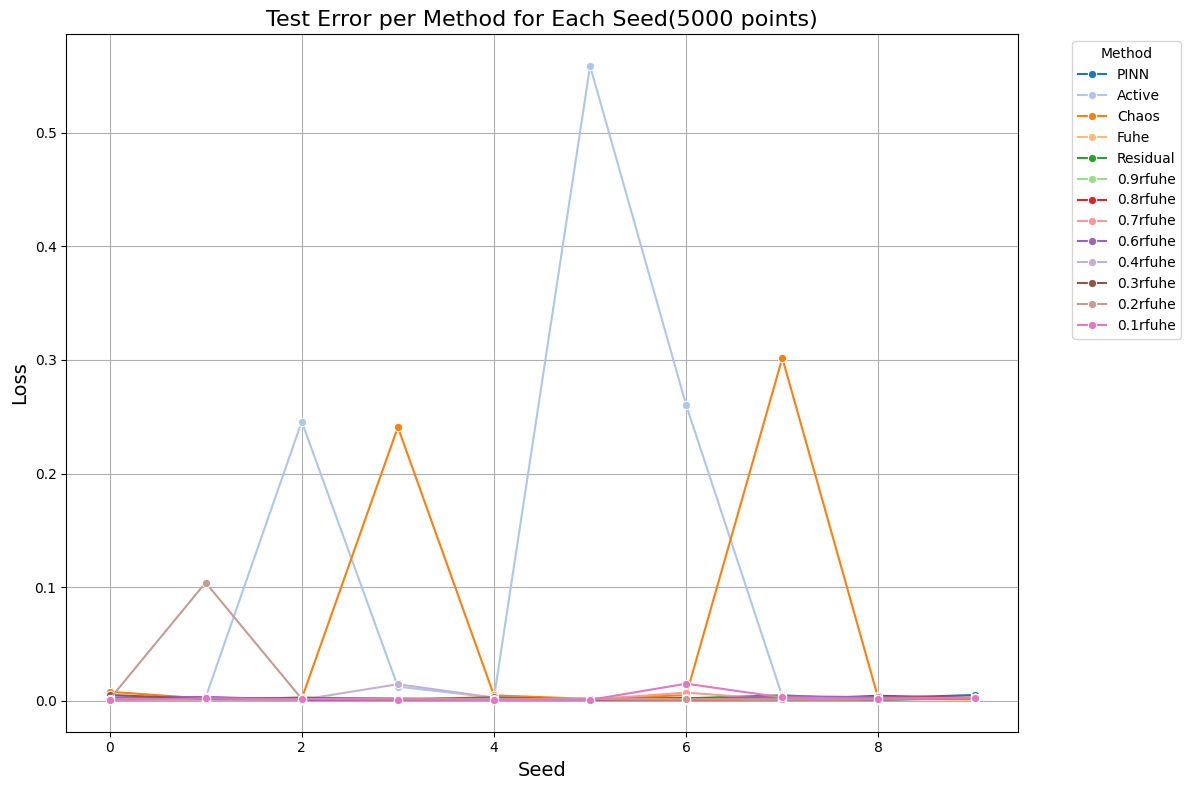

In [3]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [0.0007063230914402614, 0.002804190189273526, 0.00126253618025796, 0.001242725427530929, 0.0008444580632722601, 0.0009737519544793839, 0.0020071610091819386, 0.003560095597877306, 0.002389106897580098, 0.005124045148642077],
    'Active': [0.0029664008281226756, 0.002900636683612396, 0.2457507827020962, 0.012468896956227517, 0.0027282670647510447, 0.558673230058593, 0.2601230966179169, 0.003759524103628301, 0.0019696252784375447, 0.0021531289351725746],
    'Chaos': [0.007959673754598627, 0.0019329066699903443, 0.001975508143980076, 0.24085865069478862, 0.004758391655903856, 0.0016587641673176917, 0.004980813279823981, 0.3016968409785879, 0.0016994275234375794, 0.0011875992696930523],
    'Fuhe': [0.0024837670867086385, 0.001011948654848211, 0.0009419128659060002, 0.0015564554933805552, 0.003161094265327604, 0.0010445785332440242, 0.0016022763252876537, 0.0011437998341958674, 0.0024606653267272177, 0.002517828172245783],
    'Residual': [0.0016799871968204078, 0.001065704348916316, 0.0027659820166434654, 0.0019940149654720752, 0.0011858800227977375, 0.0014340133941489678, 0.002170396274432127, 0.004881426907006295, 0.000810321807294547, 0.0023977652939463],
    '0.9rfuhe': [0.0016438246407212303, 0.0014013230295392455, 0.0013660792903676087, 0.0013364741063987499, 0.0012739782447715885, 0.0011561975654293584, 0.0011488124301540948, 0.0018624830357398055, 0.001356942563635309, 0.002517828172245783],
    '0.8rfuhe': [0.001312061511695524, 0.001205349618227413, 0.0008144009988365903, 0.00090195989187407, 0.0012727953016322443, 0.0011834276741433901, 0.0010734326836450282, 0.0009199262064443341, 0.004420125576795911, 0.002517828172245783],
    '0.7rfuhe': [0.0008961131391652412, 0.000989095424600051, 0.002458046009978783, 0.0014487367643715575, 0.002443224272274564, 0.0010669681174512238, 0.007200821010176, 0.0009066834318878843, 0.002300297525877894, 0.002517828172245783],
    '0.6rfuhe': [0.0028316426877186486, 0.003360949554910455, 0.0010501161300838272, 0.0009265700876782028, 0.001984146559115242, 0.001276468699565246, 0.0016260602142859771, 0.0039674878697791354, 0.0031811136055454044, 0.002517828172245783],
    '0.4rfuhe': [0.0013332749539042062, 0.0009183198057893727, 0.00096602249879712, 0.014598225750500573, 0.0028124296810842515, 0.0019987639972875075, 0.001755986820592753, 0.0009200696270925744, 0.0011612029422901726, 0.002517828172245783],
    '0.3rfuhe': [0.005163480245571326, 0.0015981758542366646, 0.0026446813105945217, 0.000961398857232361, 0.0030215165913260005, 0.0011912524751431358, 0.0025578775028200457, 0.001204175871028478, 0.001108842725192792, 0.002517828172245783],
    '0.2rfuhe': [0.0012226375097308857, 0.10401452369602589, 0.001641167359614553, 0.0014778457364161735, 0.0016327696951112759, 0.0016096210099377738, 0.0015239803138177423, 0.0013635384880871305, 0.0017020909055048032, 0.002517828172245783],
    '0.1rfuhe': [0.0008854992132726625, 0.0020295870262673583, 0.001466767694784049, 0.0011117663794196616, 0.000676117301359016, 0.0008180209173074617, 0.01506429174997256, 0.002918193385704768, 0.0018035903148995705, 0.002517828172245783]
}

# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('Test Error per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

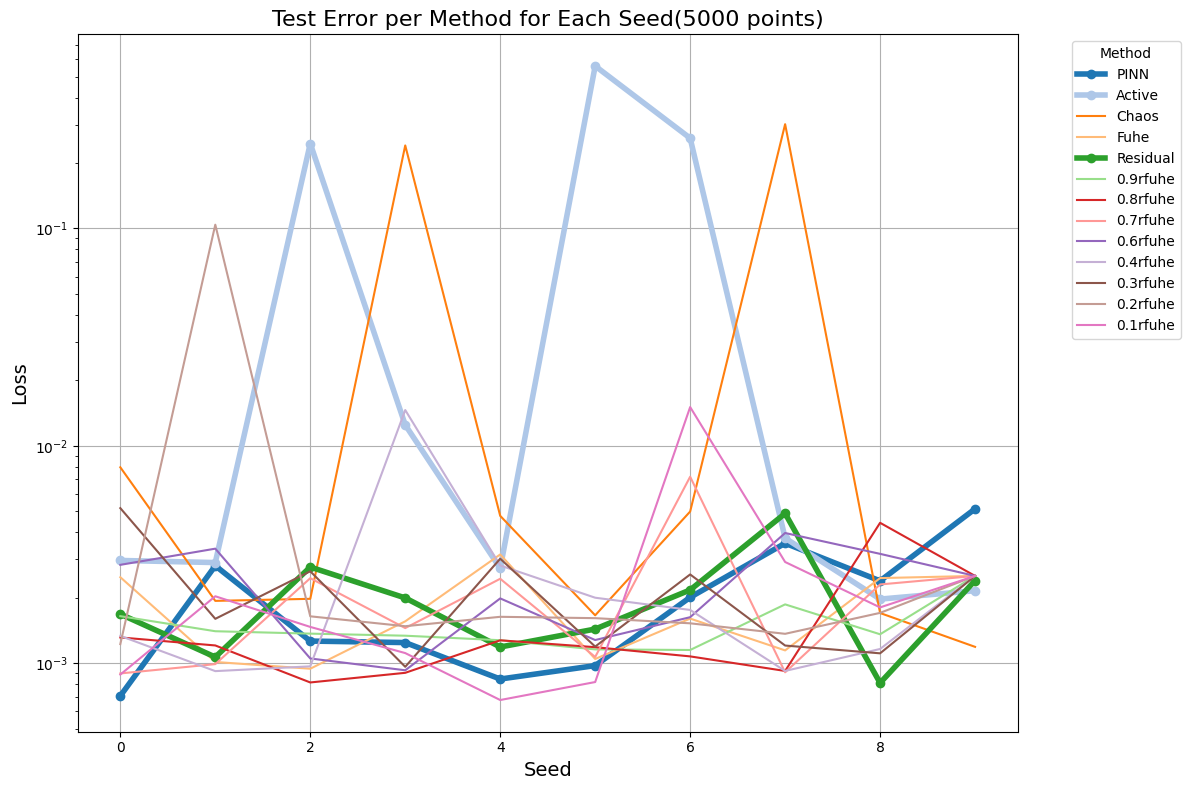

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = df[df['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

plt.yscale('log')  # 使用对数坐标

# 4. 设置图形标题和标签
plt.title('Test Error per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\1171553151.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\1171553151.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


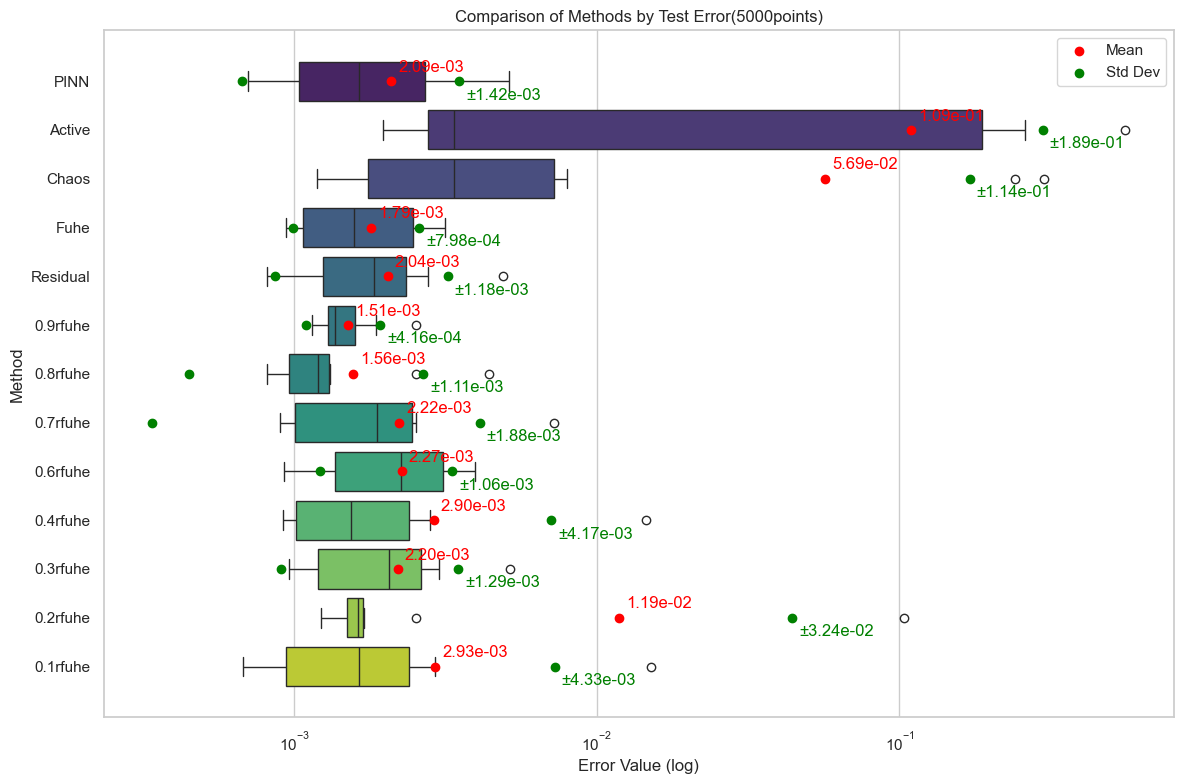

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(5000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\2016044700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\2016044700.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


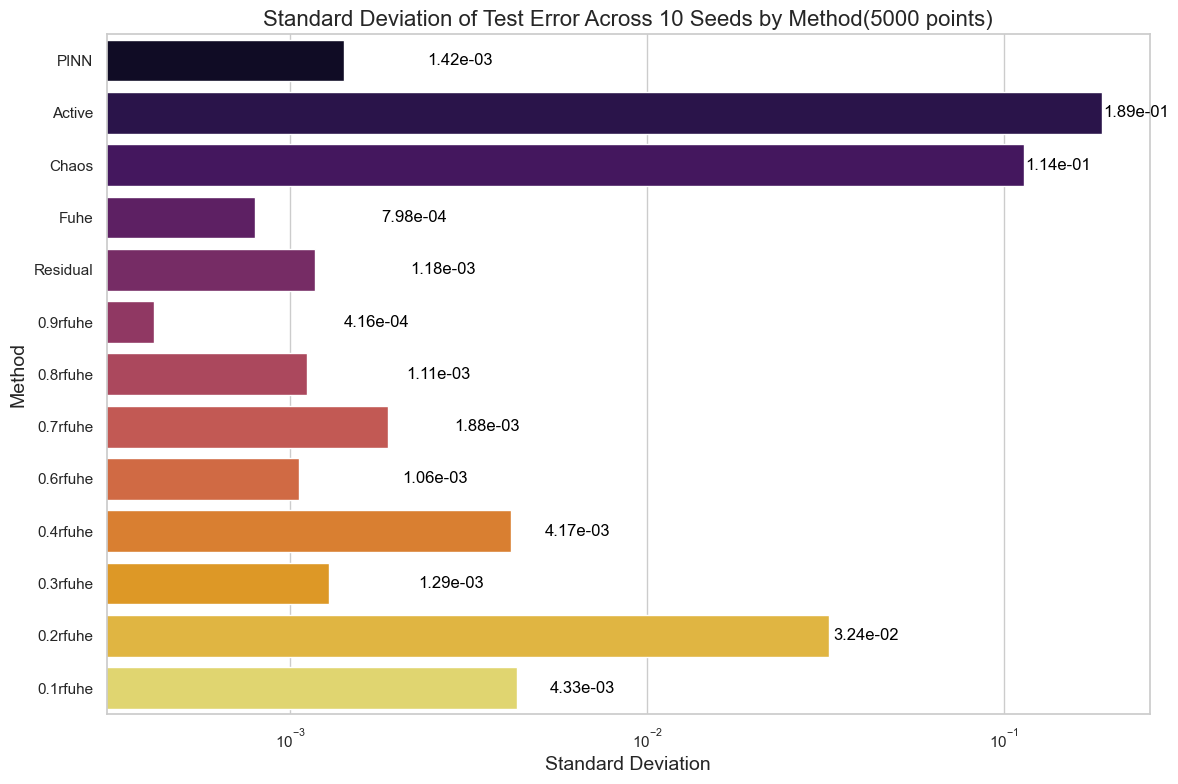

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(5000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

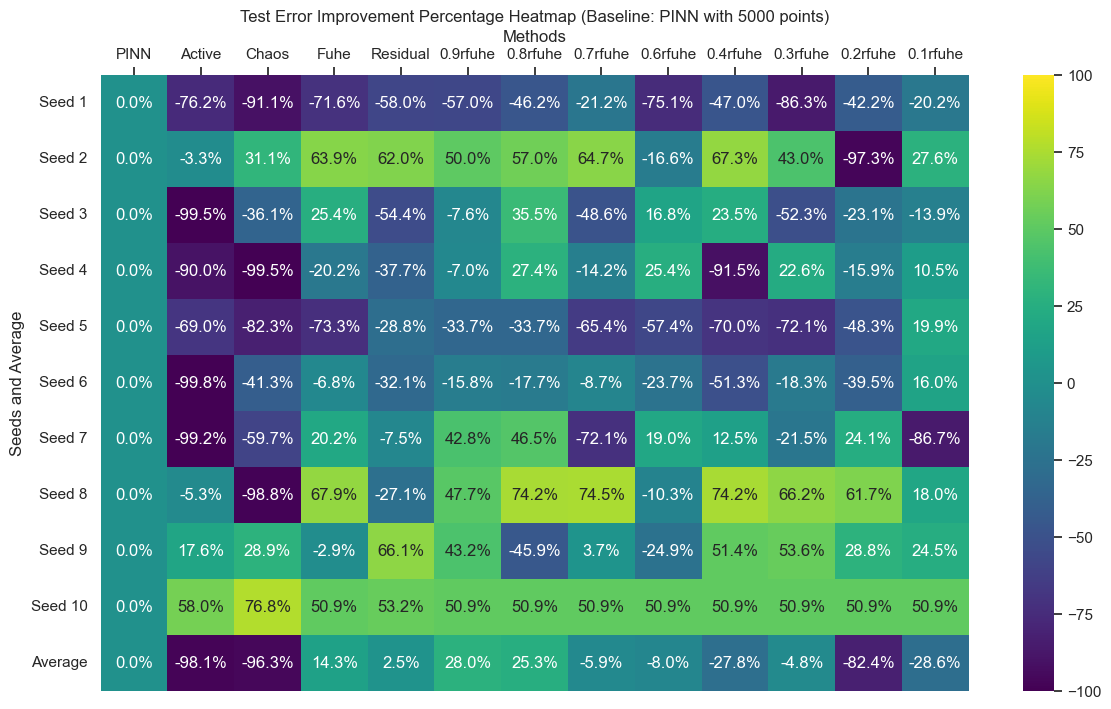

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



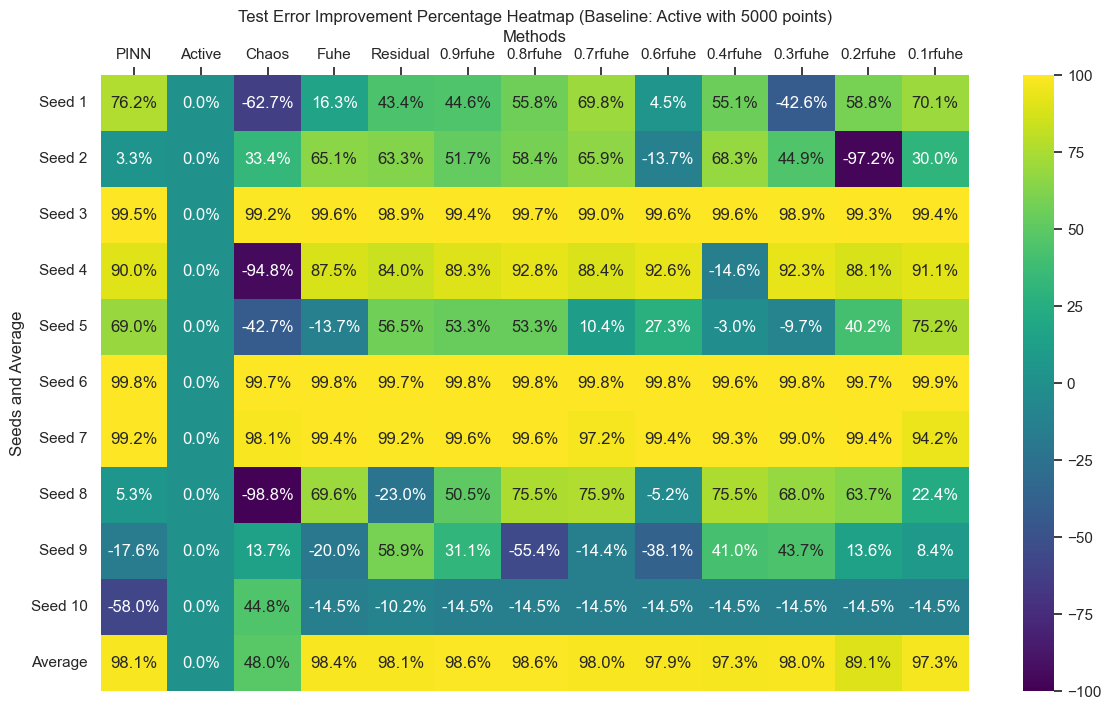

In [10]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



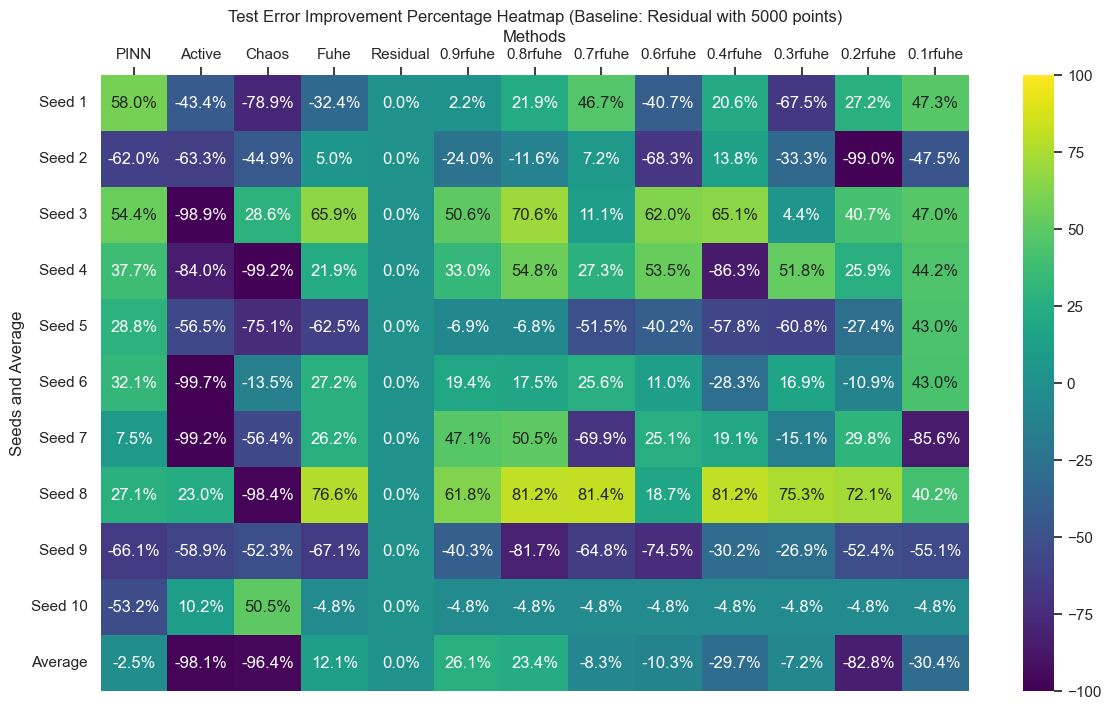

In [11]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



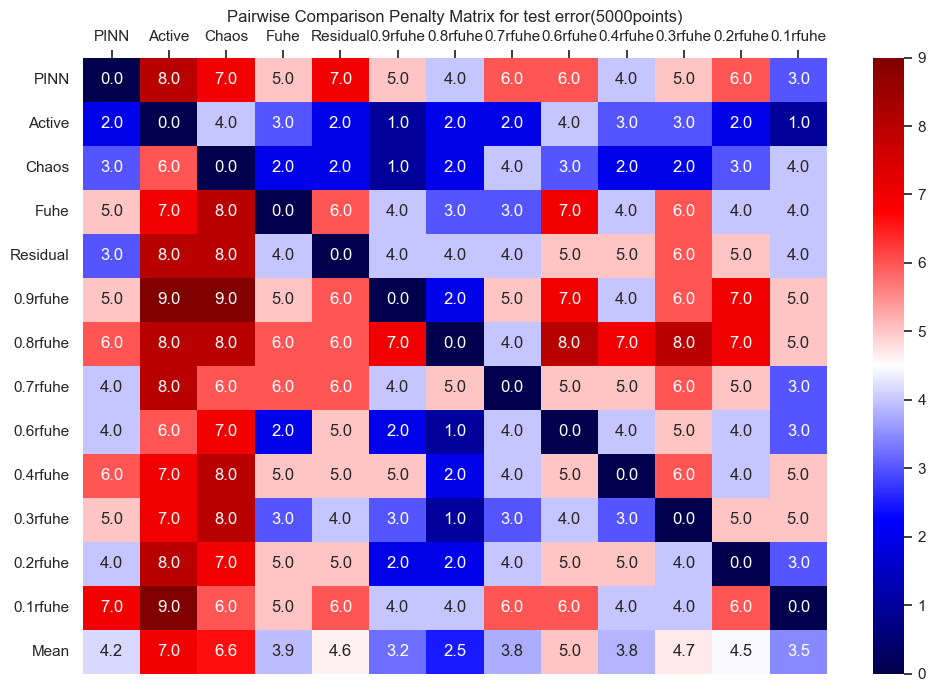

In [12]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(5000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


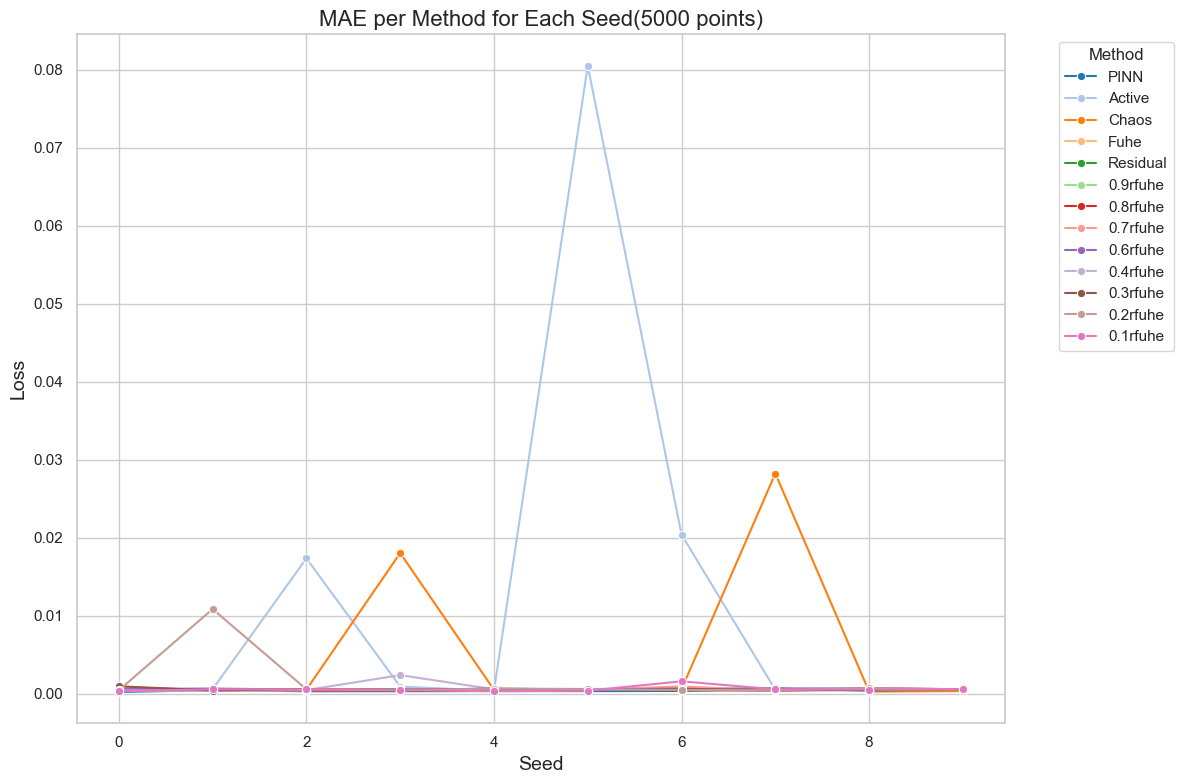

In [16]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [0.00020110625567238156, 0.000422596196282805, 0.00029005750333293363, 0.0002954285334509728, 0.0003172089012438414, 0.00030838169353719343, 0.0003284961631744269, 0.0006029528961829384, 0.00041397585171689804, 0.0004865854636230181],
    'Active': [0.00044458394197633577, 0.000547092938869804, 0.017338268996791046, 0.0008849270500661211, 0.000361846978547577, 0.0805185115412195, 0.020374558780459743, 0.0004680173147500438, 0.0003742411399865529, 0.0003392251460884864],
    'Chaos': [0.0008561999258209218, 0.00040696553032030196, 0.0004924769027248318, 0.018018017401407266, 0.0004735643815234967, 0.00044610356416051615, 0.0005510663754393037, 0.028215385862423482, 0.0002446844661367908, 0.0003089512864151936],
    'Fuhe': [0.000698434285631446, 0.00035932408454436126, 0.00036742309171382194, 0.00041640904153307057, 0.0005609131347861378, 0.0004999740492337055, 0.0006453353876314516, 0.0004239058032534571, 0.0005624390230230847, 0.0005445679330565064],
    'Residual': [0.0003999136256394304, 0.0004433159375906283, 0.000525666990356489, 0.0005516645380404734, 0.0004588275821368117, 0.0005717585573249615, 0.0006199098423067694, 0.0006510402682006957, 0.0003660637468970569, 0.0005183167246182418],
    '0.9rfuhe': [0.0004276405947133245, 0.0005369751280764252, 0.0005229066370084793, 0.00048403047308312295, 0.00046916308539532024, 0.0004538129640980086, 0.00045046921828914273, 0.0004889021848578292, 0.0004957770300598298, 0.0005445679330565064],
    '0.8rfuhe': [0.0003916661508240624, 0.000509066063089636, 0.000371283849125416, 0.00040915493547771087, 0.00037676088161488783, 0.0004953217349632483, 0.00042148396587329937, 0.0003717328510366433, 0.0006522125705403945, 0.0005445679330565064],
    '0.7rfuhe': [0.0003861028000508052, 0.0004008080754223145, 0.000499772814696196, 0.0004470439738519124, 0.0005222646297917091, 0.00046551018384517225, 0.0009137902569553807, 0.00034754766572339565, 0.0006201567538575689, 0.0005445679330565064],
    '0.6rfuhe': [0.000572323049957928, 0.0006340573794533431, 0.0004966156255841108, 0.00041242200808892625, 0.0004789621323324614, 0.00045720015497499773, 0.00048441804461787555, 0.0006427236192594178, 0.0006594286792661495, 0.0005445679330565064],
    '0.4rfuhe': [0.0003865029660667503, 0.00037712833631782733, 0.00043648444370226113, 0.002356537377644987, 0.0005417970657316755, 0.0005002464776965368, 0.0005547576969589852, 0.00041038726495386377, 0.00045936448100656035, 0.0005445679330565064],
    '0.3rfuhe': [0.0009252652688349037, 0.00038358896867046424, 0.0005726390208645776, 0.0004649456678837336, 0.000629893652888278, 0.0005241796102883158, 0.0006184262858547592, 0.00039922870684030575, 0.00046945737955909656, 0.0005445679330565064],
    '0.2rfuhe': [0.0004122054161035488, 0.01083153465822086, 0.0005447089238046219, 0.00044804553849604945, 0.0006160950642823428, 0.000584775633155657, 0.00045811437019876165, 0.0004180363390328498, 0.0006816282365774224, 0.0005445679330565064],
    '0.1rfuhe': [0.000295655910903275, 0.0005385741464852825, 0.0005329664682887403, 0.0004314149250788334, 0.000294632684266781, 0.0003605089040757069, 0.0015631699665477087, 0.0005363050248403554, 0.0005050674637128638, 0.0005445679330565064]
}

# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('MAE per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

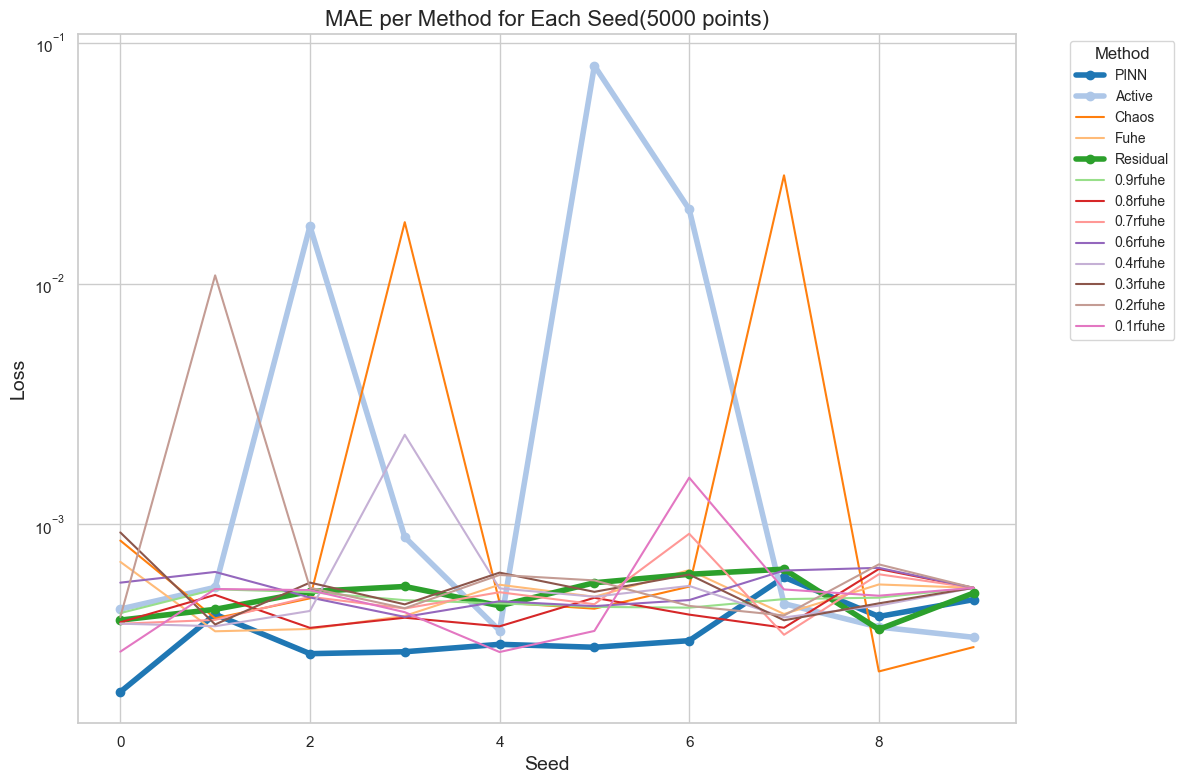

In [17]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = df[df['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

plt.yscale('log')  # 使用对数坐标

# 4. 设置图形标题和标签
plt.title('MAE per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\3695333726.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\3695333726.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


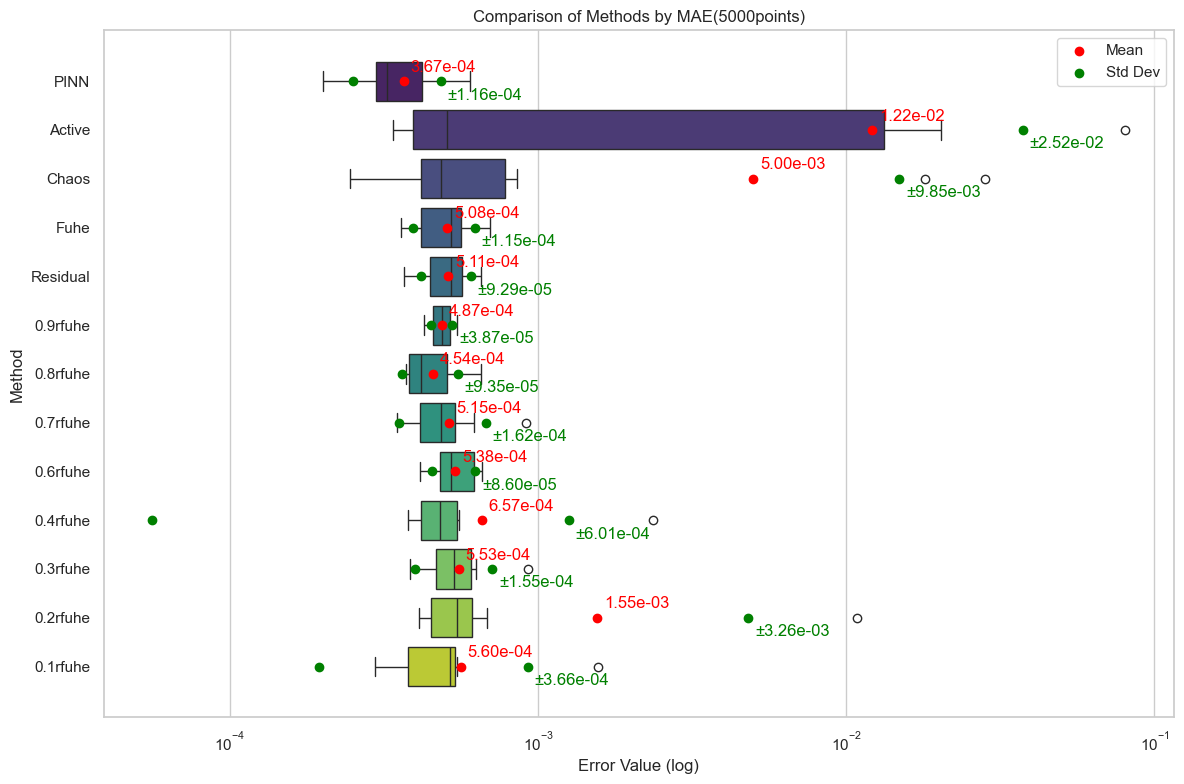

In [18]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(5000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\1035682256.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\1035682256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


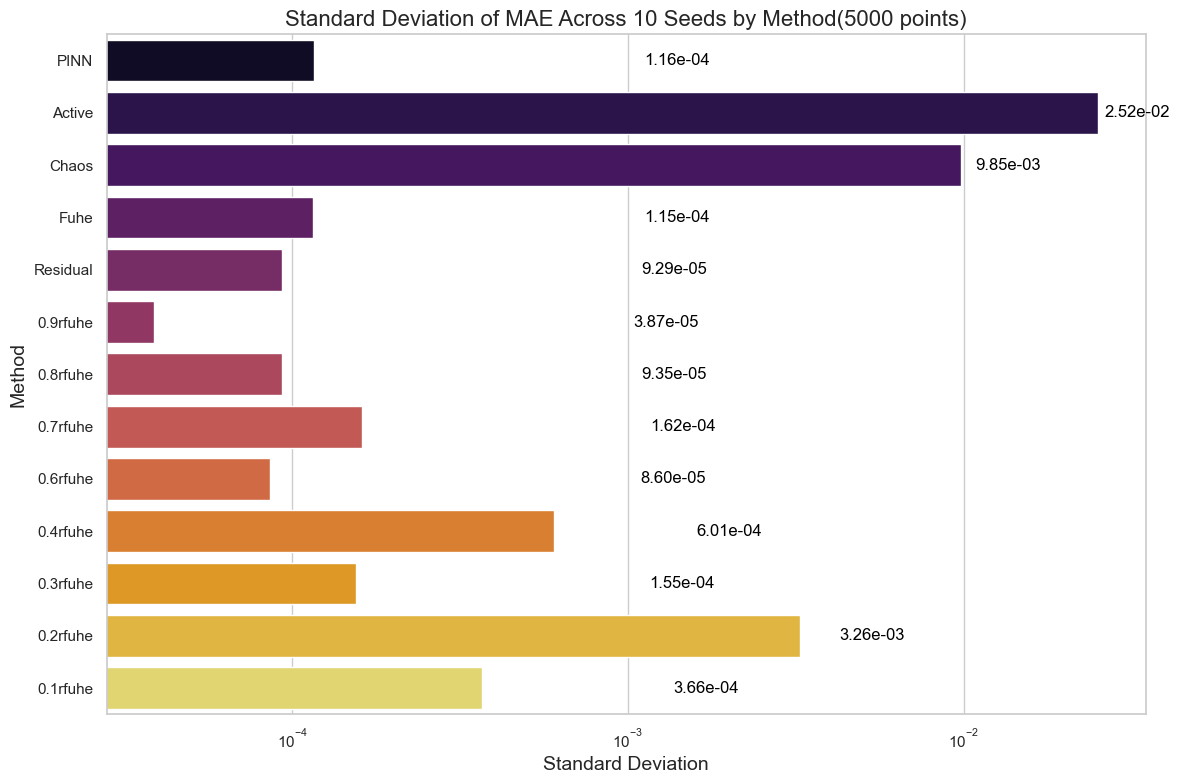

In [20]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(5000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

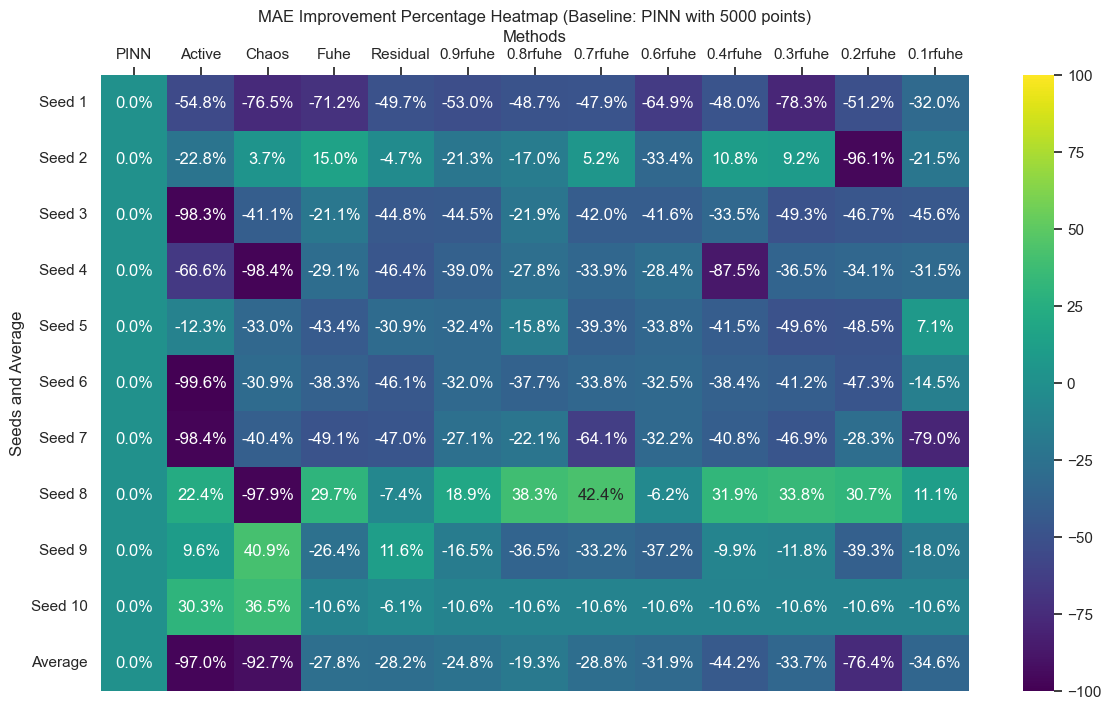

In [21]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



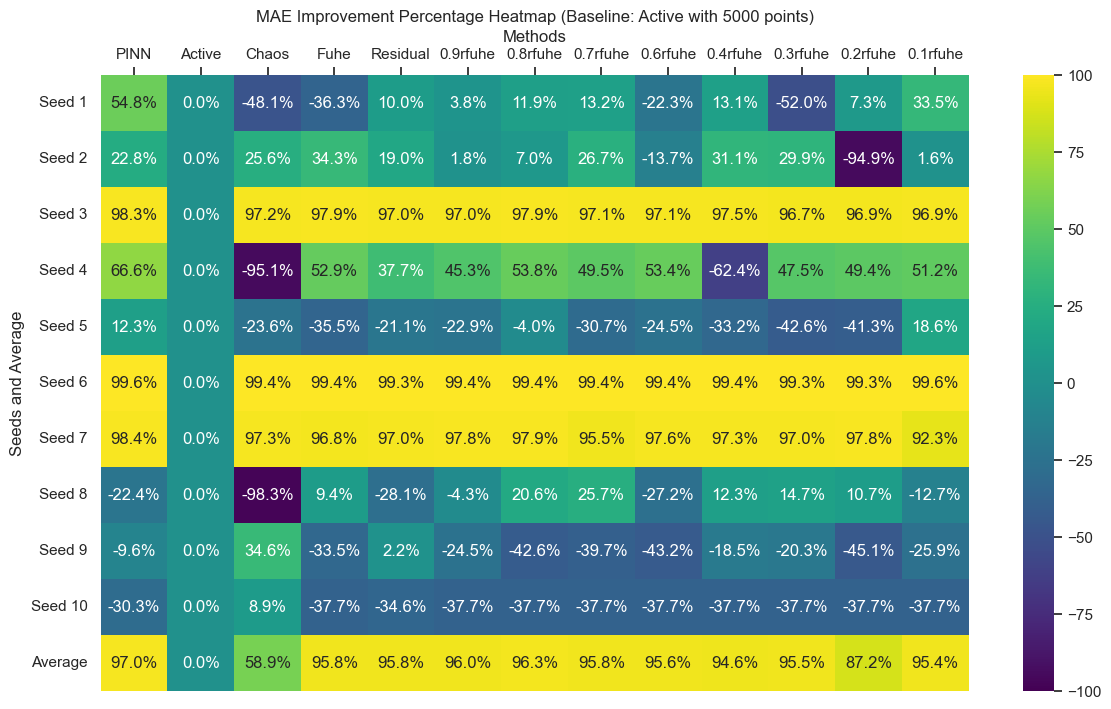

In [22]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



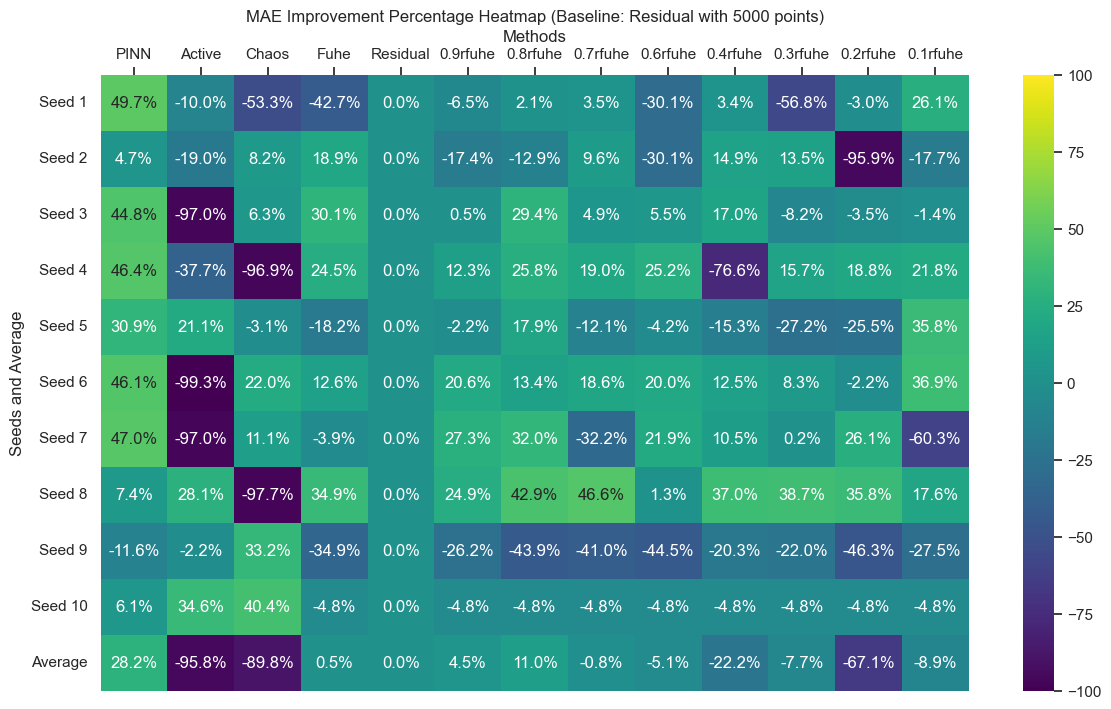

In [23]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



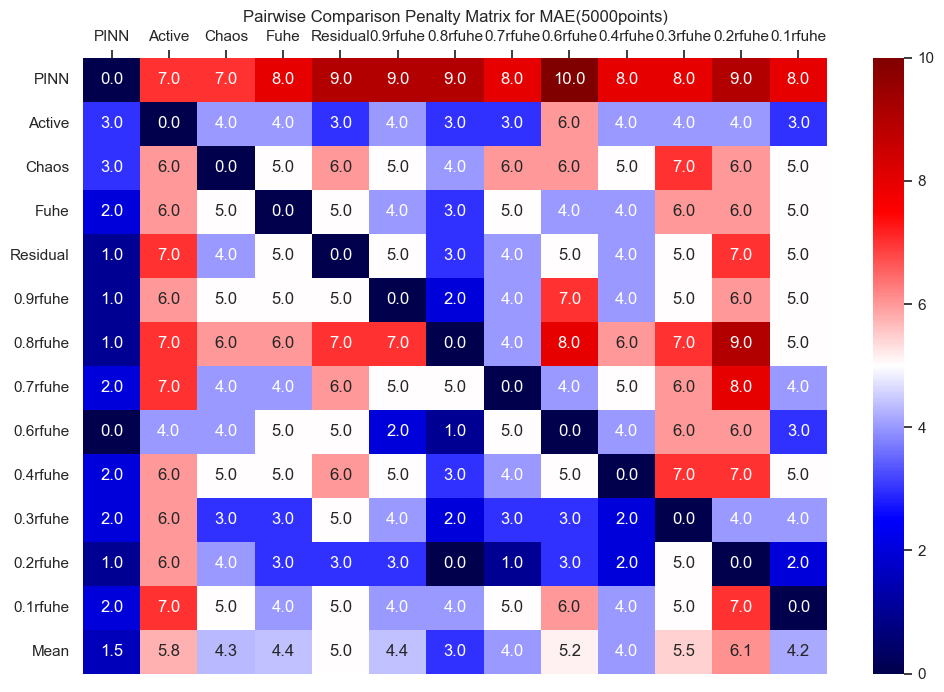

In [24]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(5000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


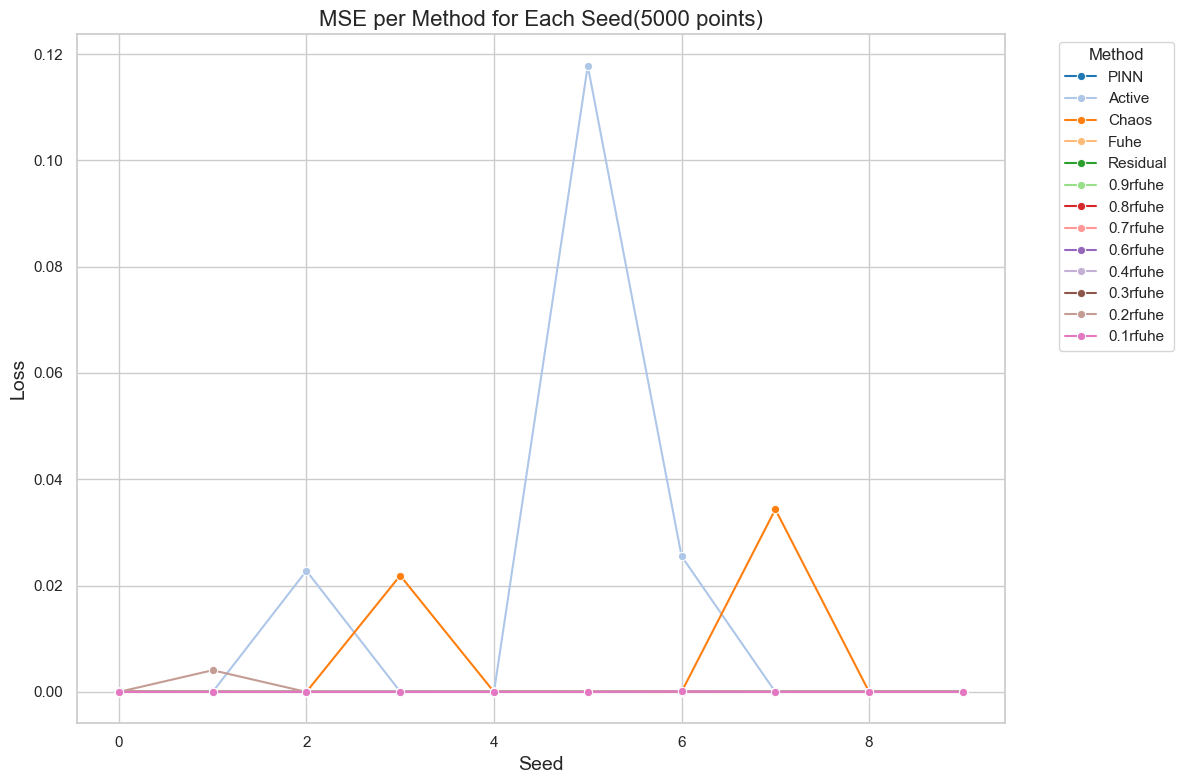

In [27]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [1.882872364119515e-07, 2.967761543815827e-06, 6.015915628513956e-07, 5.828602536824903e-07, 2.691350407926965e-07, 3.5785802158396217e-07, 1.520472240391788e-06, 4.783407630594232e-06, 2.1541961041384644e-06, 9.909231334263006e-06],
    'Active': [3.3210371920378305e-06, 3.1754168282118707e-06, 0.02279312599905615, 5.867730295071771e-05, 2.809233459496889e-06, 0.11779579712480841, 0.025537119140374244, 5.334329261557974e-06, 1.4641355669058881e-06, 1.7496619467948828e-06],
    'Chaos': [2.3911378107435178e-05, 1.410054312923358e-06, 1.4728947718847802e-06, 0.021894678377980984, 8.54544025966226e-06, 1.0384446713443924e-06, 9.362990750469652e-06, 0.034352282405287746, 1.089982103310887e-06, 5.322968738095622e-07],
    'Fuhe': [2.328283215903102e-06, 3.8648356163295697e-07, 3.3483860975108035e-07, 9.142974006341159e-07, 3.7712816299000606e-06, 4.1180940884777834e-07, 9.68922192706283e-07, 4.937579830702112e-07, 2.28517345799096e-06, 2.3925787933987884e-06],
    'Residual': [1.0651873883197202e-06, 4.2863491873402244e-07, 2.8874387212900553e-06, 1.500620581864938e-06, 5.307568133607128e-07, 7.761050108879463e-07, 1.777837826817237e-06, 8.993063360732978e-06, 2.478158759479252e-07, 2.1698385034115415e-06],
    '0.9rfuhe': [1.0198235679120355e-06, 7.411235104582261e-07, 7.043132957169932e-07, 6.741168296777283e-07, 6.12545135687053e-07, 5.045197512846817e-07, 4.980951624343292e-07, 1.3091780742596317e-06, 6.94923506687566e-07, 2.3925787933987884e-06],
    '0.8rfuhe': [6.497143572525095e-07, 5.483276436657995e-07, 2.5031718553106206e-07, 3.0703545142929545e-07, 6.11408115247414e-07, 5.285639187930204e-07, 4.3487425801231815e-07, 3.1938907299604904e-07, 7.3736630446984e-06, 2.3925787933987884e-06],
    '0.7rfuhe': [3.0306777612295213e-07, 3.692244545807697e-07, 2.2803110272577177e-06, 7.92123749294019e-07, 2.252893906318505e-06, 4.296521173769299e-07, 1.9569426730344357e-05, 3.102597451696442e-07, 1.9970185384861963e-06, 2.3925787933987884e-06],
    '0.6rfuhe': [3.026153638340576e-06, 4.26322309646435e-06, 4.1618721101790624e-07, 3.240191090472048e-07, 1.4858041540688437e-06, 6.149423619571974e-07, 9.979006821148042e-07, 5.940804858742125e-06, 3.819200250115858e-06, 2.3925787933987884e-06],
    '0.4rfuhe': [6.708933906758924e-07, 3.182745947983294e-07, 3.521993535250651e-07, 8.042928772573698e-05, 2.985227385945674e-06, 1.5077769787757961e-06, 1.1637416446679031e-06, 3.1948866915566957e-07, 5.088975113095894e-07, 2.3925787933987884e-06],
    '0.3rfuhe': [1.0062342867238473e-05, 9.639692972125882e-07, 2.639737634615621e-06, 3.48835981576196e-07, 3.445593492285214e-06, 5.355767356151804e-07, 2.469298293404732e-06, 5.472602609509711e-07, 4.640384579543141e-07, 2.3925787933987884e-06],
    '0.2rfuhe': [5.641693690354383e-07, 0.004083213054763744, 1.0165290954034593e-06, 8.242752843072191e-07, 1.00615278590268e-06, 9.778254491085272e-07, 8.765421118965807e-07, 7.016957951735481e-07, 1.0934012707684045e-06, 2.3925787933987884e-06],
    '0.1rfuhe': [2.9593097921845417e-07, 1.5546385335629546e-06, 8.11963943509005e-07, 4.6648871810137756e-07, 1.7252743696686155e-07, 2.5254739306161443e-07, 8.564687233824478e-05, 3.2139728916550547e-06, 1.2276932297672643e-06, 2.3925787933987884e-06]
}

# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

df = pd.DataFrame(data)

# 确保方法按指定顺序排序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 3. 设置图形标题和标签
plt.title('MSE per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

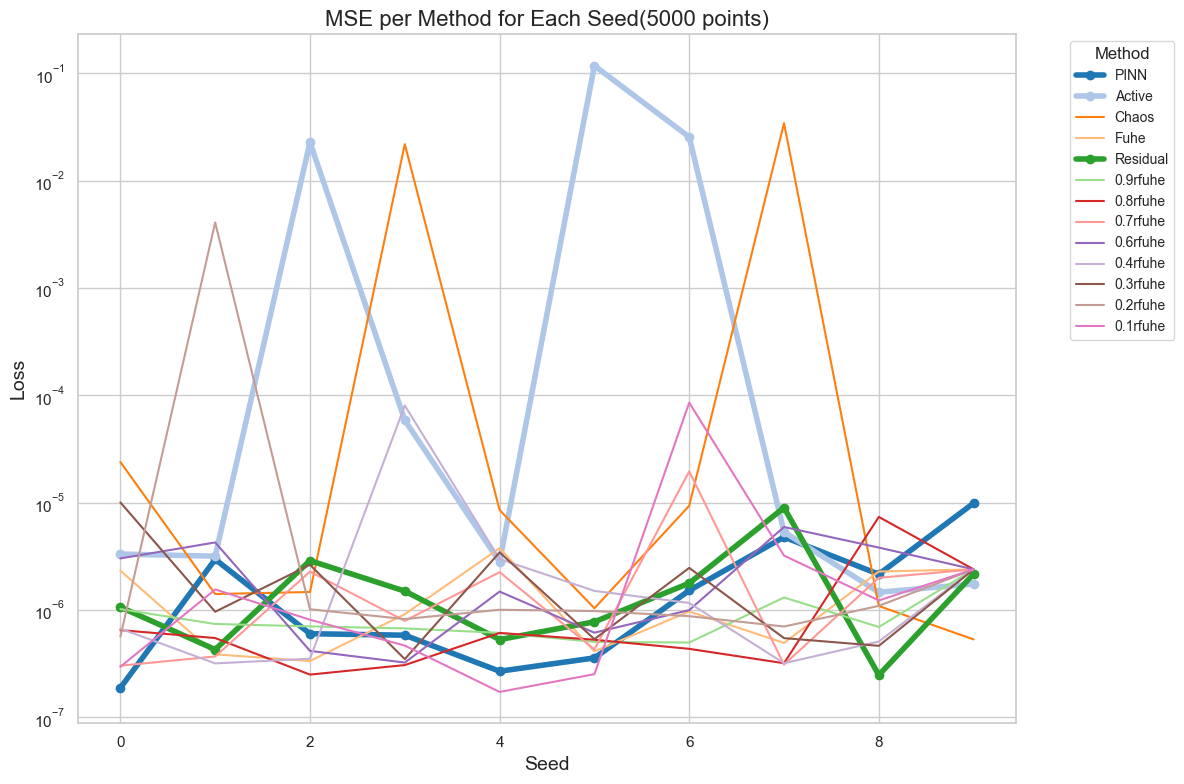

In [28]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = df[df['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

plt.yscale('log')  # 使用对数坐标

# 4. 设置图形标题和标签
plt.title('MSE per Method for Each Seed(5000 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\2238623871.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\2238623871.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)


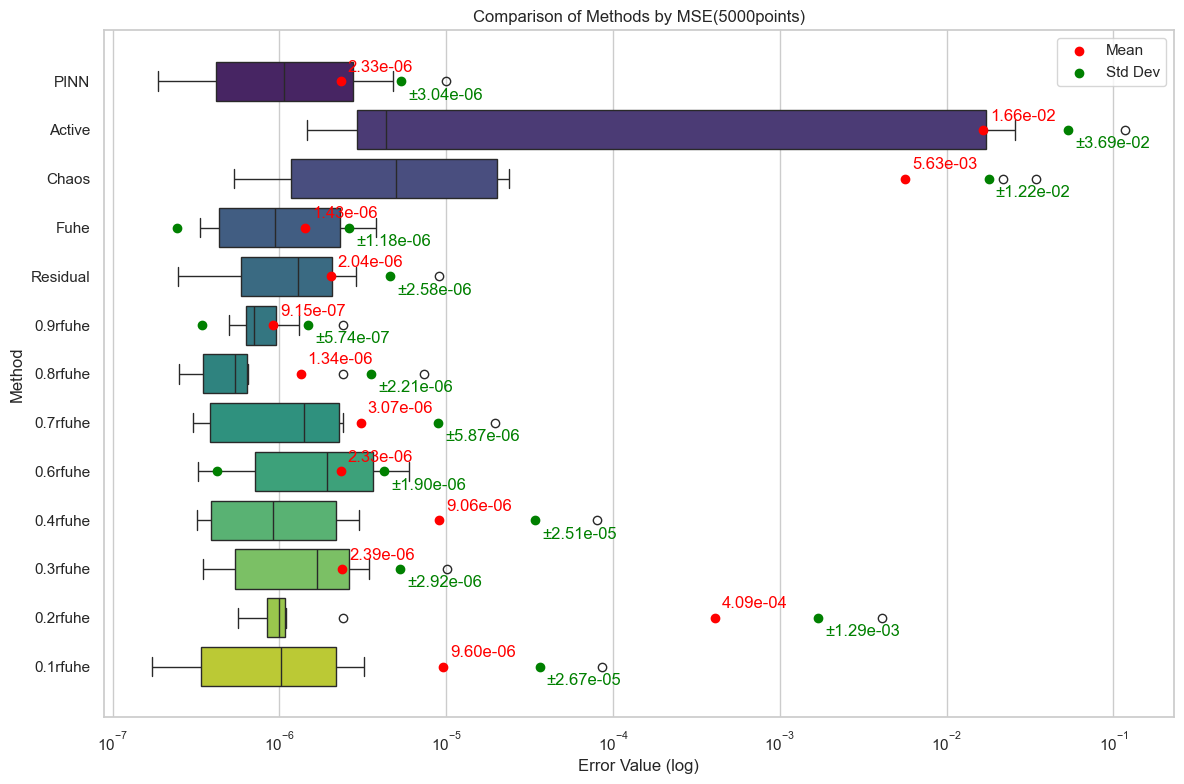

In [29]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


df = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
df['Method'] = pd.Categorical(df['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = df.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=df, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.2e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.2e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(5000points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\164530227.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = df.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_25784\164530227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


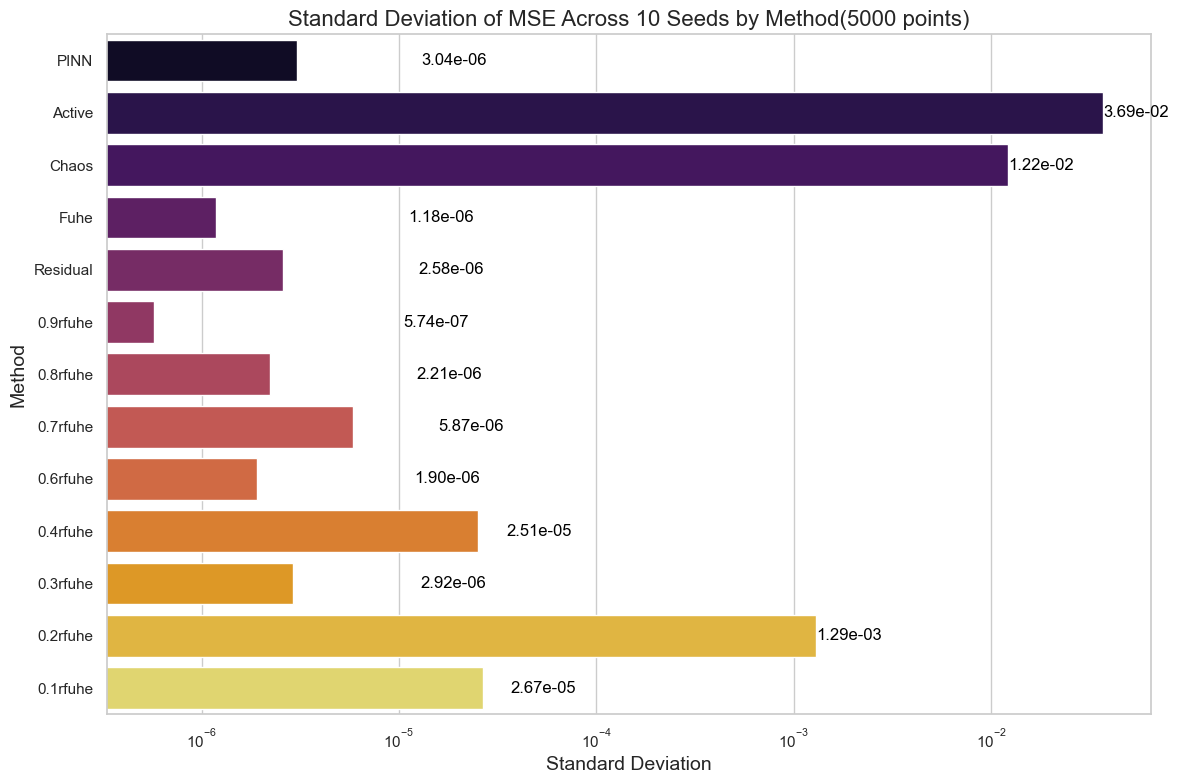

In [31]:
# 计算每种方法在10个seed下的标准差
std_df = df.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')  # 使用对数刻度

# 添加标题和轴标签
plt.title('Standard Deviation of MSE Across 10 Seeds by Method(5000 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.00001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

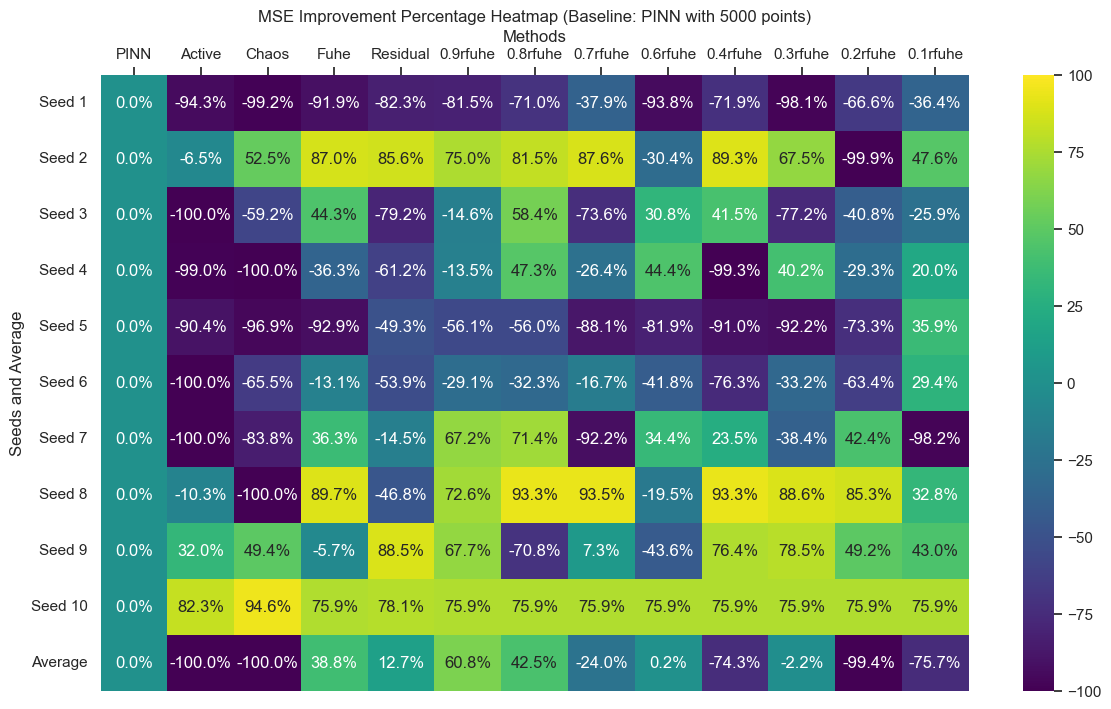

In [32]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



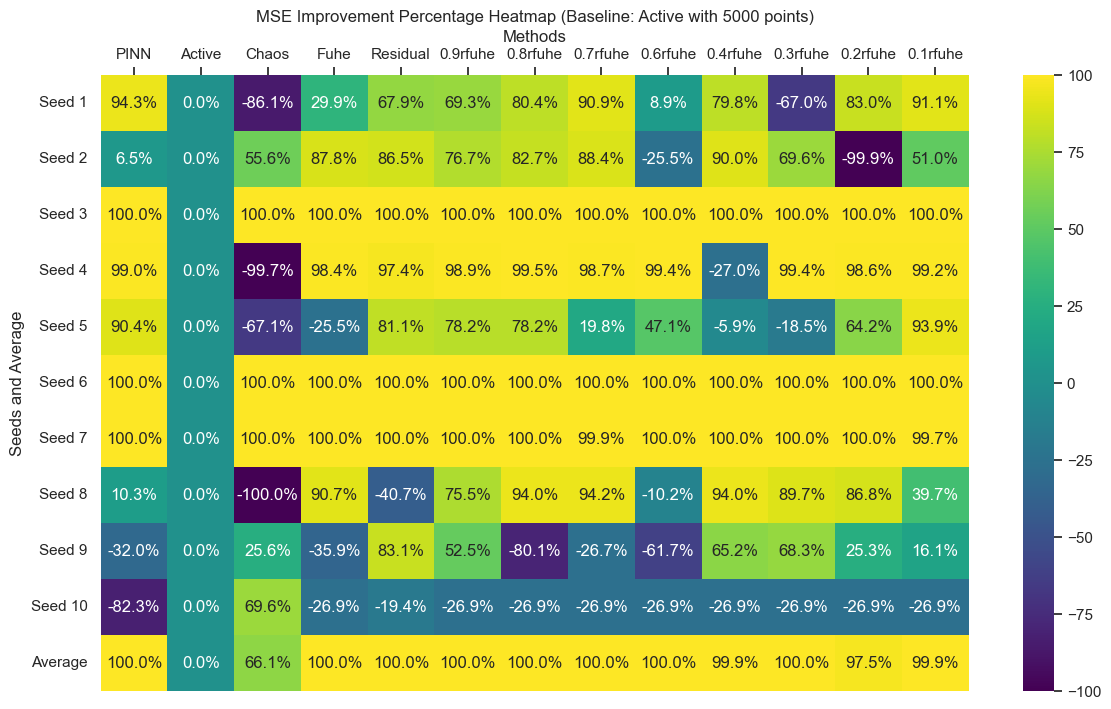

In [33]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



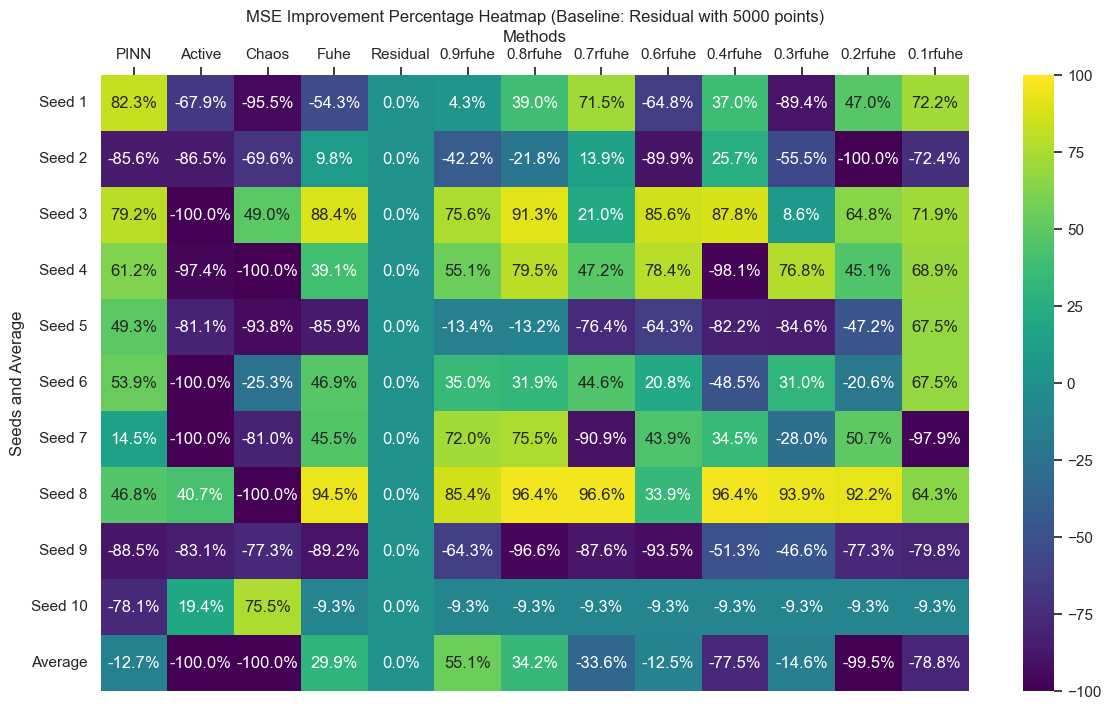

In [34]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 5000 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



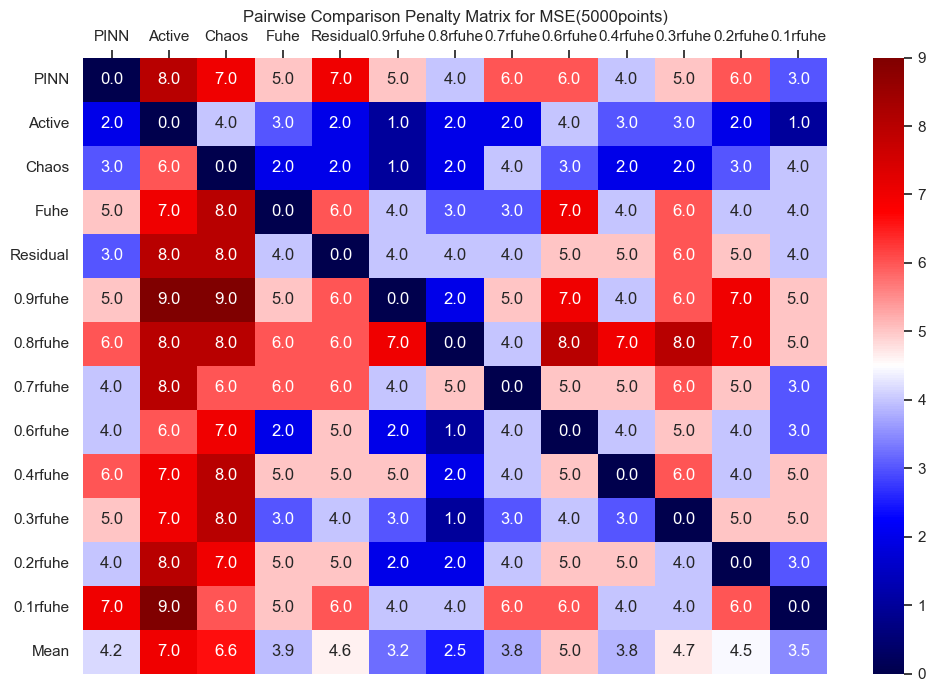

In [35]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(5000points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()
